# <b>Anime Recommender System Using Hybrid Filter</b>
<b>Muhammed Rüşen Birben 150220755</b>

## <b>1 - Data Preparing and Understanding</b>

### <b>1.a Preparing Anime Info Dataframes</b>

#### Importing pandas and reading anime csv files

In [1]:
# ALL RELATED LIBRARIES OF THIS NOTEBOOK
# !pip install numpy
# !pip install pandas
# !pip install scikit-learn
# !pip install scipy
# !pip install matplotlib
# !pip install seaborn
# !pip install yake

import pandas as pd
import numpy as np
import swifter
anime_synopsis = pd.read_csv("data_raw/data/anime_with_synopsis.csv")
anime_df = pd.read_csv("data_raw/data/anime.csv")

#### Getting info for both dfs

In [2]:
anime_df.iloc[:,0:19].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17562 entries, 0 to 17561
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MAL_ID         17562 non-null  int64 
 1   Name           17562 non-null  object
 2   Score          17562 non-null  object
 3   Genres         17562 non-null  object
 4   English name   17562 non-null  object
 5   Japanese name  17562 non-null  object
 6   Type           17562 non-null  object
 7   Episodes       17562 non-null  object
 8   Aired          17562 non-null  object
 9   Premiered      17562 non-null  object
 10  Producers      17562 non-null  object
 11  Licensors      17562 non-null  object
 12  Studios        17562 non-null  object
 13  Source         17562 non-null  object
 14  Duration       17562 non-null  object
 15  Rating         17562 non-null  object
 16  Ranked         17562 non-null  object
 17  Popularity     17562 non-null  int64 
 18  Members        17562 non-n

In [3]:
anime_df.iloc[:,19:].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17562 entries, 0 to 17561
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Favorites      17562 non-null  int64 
 1   Watching       17562 non-null  int64 
 2   Completed      17562 non-null  int64 
 3   On-Hold        17562 non-null  int64 
 4   Dropped        17562 non-null  int64 
 5   Plan to Watch  17562 non-null  int64 
 6   Score-10       17562 non-null  object
 7   Score-9        17562 non-null  object
 8   Score-8        17562 non-null  object
 9   Score-7        17562 non-null  object
 10  Score-6        17562 non-null  object
 11  Score-5        17562 non-null  object
 12  Score-4        17562 non-null  object
 13  Score-3        17562 non-null  object
 14  Score-2        17562 non-null  object
 15  Score-1        17562 non-null  object
dtypes: int64(6), object(10)
memory usage: 2.1+ MB


In [4]:
anime_synopsis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16214 entries, 0 to 16213
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   MAL_ID     16214 non-null  int64 
 1   Name       16214 non-null  object
 2   Score      16214 non-null  object
 3   Genres     16214 non-null  object
 4   sypnopsis  16206 non-null  object
dtypes: int64(1), object(4)
memory usage: 633.5+ KB


#### Dropping duplicates for both

In [5]:
before = len(anime_df.index)
anime_df.drop_duplicates(inplace=True)
after = len(anime_df.index)
print(f"Before anime {before}\nAfter anime {after}")

before = len(anime_synopsis.index)
anime_synopsis.drop_duplicates(inplace=True)
after = len(anime_synopsis.index)
print(f"Before anime_synopsis {before}\nAfter anime_synopsis {after}")
del after, before

Before anime 17562
After anime 17562
Before anime_synopsis 16214
After anime_synopsis 16214


#### Renaming columns of dfs

In [6]:
print(anime_df.columns)
print("Feature num: ",anime_df.shape[1])
anime_df.rename(columns={"English name":"english_name", "Japanese name":"japanese_name",
 "On-Hold":"on_hold", "Plan to Watch":"plan_to_watch", "MAL_ID":"anime_id"}, inplace=True)
anime_df.rename(columns={i:i.replace("-","_") for i in anime_df.columns}, inplace=True)
anime_df.rename(columns={i:i.lower() for i in anime_df.columns}, inplace=True)
print(anime_df.columns)

Index(['MAL_ID', 'Name', 'Score', 'Genres', 'English name', 'Japanese name',
       'Type', 'Episodes', 'Aired', 'Premiered', 'Producers', 'Licensors',
       'Studios', 'Source', 'Duration', 'Rating', 'Ranked', 'Popularity',
       'Members', 'Favorites', 'Watching', 'Completed', 'On-Hold', 'Dropped',
       'Plan to Watch', 'Score-10', 'Score-9', 'Score-8', 'Score-7', 'Score-6',
       'Score-5', 'Score-4', 'Score-3', 'Score-2', 'Score-1'],
      dtype='object')
Feature num:  35
Index(['anime_id', 'name', 'score', 'genres', 'english_name', 'japanese_name',
       'type', 'episodes', 'aired', 'premiered', 'producers', 'licensors',
       'studios', 'source', 'duration', 'rating', 'ranked', 'popularity',
       'members', 'favorites', 'watching', 'completed', 'on_hold', 'dropped',
       'plan_to_watch', 'score_10', 'score_9', 'score_8', 'score_7', 'score_6',
       'score_5', 'score_4', 'score_3', 'score_2', 'score_1'],
      dtype='object')


In [7]:
print(anime_synopsis.columns)
print("Feature num: ",anime_synopsis.shape[1])
anime_synopsis.rename(columns={"MAL_ID":"anime_id", "sypnopsis":"synopsis"}, inplace=True)
anime_synopsis.rename(columns={i:i.replace("-","_") for i in anime_synopsis.columns}, inplace=True)
anime_synopsis.rename(columns={i:i.lower() for i in anime_synopsis.columns}, inplace=True)
print(anime_synopsis.columns)

Index(['MAL_ID', 'Name', 'Score', 'Genres', 'sypnopsis'], dtype='object')
Feature num:  5
Index(['anime_id', 'name', 'score', 'genres', 'synopsis'], dtype='object')


#### Filter Adult Content

In [8]:
# will use adult_anime_ids for filtering the ratings of adult animes later on
adult_anime_ids = anime_df[anime_df['rating'] == 'Rx - Hentai']['anime_id'] # Rx-Hentai is basically P*rn* in anime style
anime_df = anime_df[anime_df['rating'] != 'Rx - Hentai']
anime_synopsis = anime_synopsis[anime_synopsis.index.isin(anime_df.index)]

#### Fill 'Unknown' With np.nan or Zero for Numeric Values

In [9]:
# NUMERIC
to_int = ["episodes", "score_10","score_9","score_8","score_7","score_6","score_5","score_4","score_3","score_2","score_1"]
to_float = ["score"]

# I have done various experiments with these features, rank seems to be the best
# and the most reliable measure among these.
for i in to_int:
    print(f"feature: {i}, {(anime_df[i] == 'Unknown').sum()} unknown values filled.")
    anime_df[i]= anime_df[i].apply(lambda x: 0 if x == "Unknown" else x)
    anime_df[i] = anime_df[i].astype(float) # "0.0" could not be connverted directly to 0 so first make it float, than int
    anime_df[i] = anime_df[i].astype(int)

for i in to_float:
    print(f"feature: {i}, {(anime_df[i] == 'Unknown').sum()} unknown values filled.")
    anime_df[i]= anime_df[i].apply(lambda x: np.nan if x == "Unknown" else x)
    anime_df[i] = anime_df[i].astype(float)
    anime_synopsis[i]= anime_synopsis[i].apply(lambda x: np.nan if x == "Unknown" else x)
    anime_synopsis[i] = anime_synopsis[i].astype(float)


print(f"feature: ranking, {(anime_df['ranked'] == 'Unknown').sum()} unknown values filled.")
anime_df['ranked'] = anime_df['ranked'].replace('Unknown', np.nan)
anime_df['ranked'] = anime_df['ranked'].astype(float)
anime_df['ranked'] = anime_df['ranked'].fillna(anime_df['ranked'].max()+1)
anime_df['ranked'] = anime_df['ranked'].astype(int)



# STRING

# For the synopsis 'No synopsis information has been added to ...' should be mapped with empty string
# If we will later on use synopsis info these values should be cleansed
no_syn = 'No synopsis information has been added to this title. Help improve our database by adding a synopsis here .'
anime_synopsis.synopsis.replace(no_syn, '', inplace=True)
anime_synopsis.synopsis.fillna('', inplace=True)
print("There are ", len(anime_synopsis.synopsis[anime_synopsis.synopsis == '']), "empty synopsis (snopsis == '') ")

del i, to_float, to_int, no_syn

feature: episodes, 477 unknown values filled.
feature: score_10, 436 unknown values filled.
feature: score_9, 3154 unknown values filled.
feature: score_8, 1364 unknown values filled.
feature: score_7, 501 unknown values filled.
feature: score_6, 509 unknown values filled.
feature: score_5, 582 unknown values filled.
feature: score_4, 974 unknown values filled.
feature: score_3, 1304 unknown values filled.
feature: score_2, 1595 unknown values filled.
feature: score_1, 457 unknown values filled.
feature: score, 5124 unknown values filled.
feature: ranking, 417 unknown values filled.
There are  663 empty synopsis (snopsis == '') 


#### Looking for na

In [10]:
anime_df.isna().sum()[anime_df.isna().sum() != 0] 
# Some score are missing (won't need for content based filtering)

score    5124
dtype: int64

In [11]:
anime_synopsis.isna().sum()[anime_synopsis.isna().sum() != 0] 
# some scores are missing (won't need for content based filtering, in fact for this df we will only use the synopsis column) 

score    4836
dtype: int64

#### Saving as csv

In [12]:
anime_df.to_csv("data_cleansed/anime_info.csv", index=False)
anime_synopsis.to_csv("data_cleansed/anime_synopsis.csv", index=False)
del anime_synopsis
del anime_df

### <b>1.b Preparing Ratings Dataframe</b>

#### Reading the rating dataset & dropping the duplicates

In [13]:
# A large dataset (takes about 1 min to load & remove duplicates)
# (might even give an error depending on RAM)
rating_master = pd.read_csv('data_raw/data/animelist.csv')
print(f"Before removing duplicate elements: {len(rating_master.index):,} ratings")
rating_master.drop_duplicates(inplace=True)
print(f"After removing duplicate elements: {len(rating_master.index):,} ratings")

Before removing duplicate elements: 109,224,747 ratings
After removing duplicate elements: 109,224,746 ratings


#### Looking for info

In [14]:
rating_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109224746 entries, 0 to 109224746
Data columns (total 5 columns):
 #   Column            Dtype
---  ------            -----
 0   user_id           int64
 1   anime_id          int64
 2   rating            int64
 3   watching_status   int64
 4   watched_episodes  int64
dtypes: int64(5)
memory usage: 4.9 GB


In [15]:
rating_master.isna().sum()[rating_master.isna().sum() != 0] # No feature with na in it

Series([], dtype: int64)

#### Filtering Adult Anime Ratings

In [16]:
rating_master = rating_master[~rating_master['anime_id'].isin(adult_anime_ids)]
del adult_anime_ids

In [17]:
rating_master = rating_master[rating_master['watching_status'] != 6]
# If watching status == 6 => plan to watch then filter them out
# users gave rating without even watching a bit, biased

# we won't need these features anymore
rating_master = rating_master[['user_id', 'anime_id', 'rating']]  
print("There were 109_224_746 ratins before.")
print(f"Now with filtering there are {len(rating_master.index)} ratings")

There were 109_224_746 ratins before.
Now with filtering there are 79793982 ratings


#### Saving rating files to cvs
Warning: takes too long to save csv

In [18]:
# this step takes a bit long too (1 min 30 sec approx.)
rating_master.to_csv("data_cleansed/ratings.csv", index=False)
del rating_master

### <b>1.c Reading watching status mapping csv</b>

In [19]:
df = pd.read_csv("data_raw/data/watching_status.csv")

In [20]:
print(df) # nothing to clear, can keep these in mind. (i won't need though)
# not worth copying to clensed_data folder
del df

   status         description
0       1  Currently Watching
1       2           Completed
2       3             On Hold
3       4             Dropped
4       6       Plan to Watch


## Cleansed Data Summary:

In [21]:
import os
print("Raw data consisted of these (excluding html folder)")
os.listdir('data_raw/data/')

Raw data consisted of these (excluding html folder)


['anime.csv',
 'animelist.csv',
 'anime_with_synopsis.csv',
 'rating_complete.csv',
 'watching_status.csv']

In [22]:
os.listdir('data_cleansed')

['anime_info.csv', 'anime_synopsis.csv', 'ratings.csv']

 - <b>anime_info.csv:</b> consist of animes' detailed information like genre, studio, airing year, ratings number for each rate degree etc.<br>
 - <b>anime_synopsis.csv:</b> consist of basic info about anime like score and genre. But most importantly it includes the synopsis of anime. (Might use synopsis with term frequency algorithm. Or i might not use it, Haven't decided yet)<br>
 - <b>ratings.csv:</b> includes all of the ratings of users that are given for animes which user actually watched compleatly. (watching_status==2)<br> Watching status is a feature that exist in animelist.csv file. I only considered the subset of animelist.csv which is saved as ratings.csv
* NOTE: I did not use watching_status.csv and animelist.csv as i have only used rating_complete.csv that consist of ratings that are given after watching the anime completely
(watching_status == 2)

## <b>2 -  Data Preprocessing</b>

### 2.a Reading Cleansed Anime and Rating CSVs, Importing Related Libraries

In [1]:
from matplotlib import pyplot as plt
from sklearn import preprocessing
import seaborn as sns
import numpy as np
import pandas as pd
sns.set()

In [2]:
ratings = pd.read_csv('data_cleansed/ratings.csv')
animes = pd.read_csv('data_cleansed/anime_info.csv')

### 2.b Ratings: Removing Outlier Users' Ratings and Unpopular Anime's Ratings, Select Ratings and Scale

#### Removing Outliers: filter users that give very few (or very  large) number of ratings 

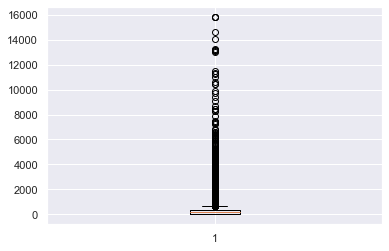

In [3]:
# If a user rated too many anime we consider them as outlier. They might be bots
# Or the opposite is also true, some users are crazy enough to create fake accounts and
# boost the anime they are fan of by giving high scores (resulting in some users giving only a few ratings). We will eliminate them. 
plt.boxplot(ratings.user_id.value_counts())
plt.show()
# bad

In [4]:
# Detecting and filtering out outlier users 
# some users have more than necessary ratings (max user has 15000 ratings. might be even
# a bot, or a real weeb :) and some have very few reviews. we don't want to include them.
temp_df = ratings.user_id.value_counts() # df that holds num of rating for each user

IQR = temp_df.quantile(q=0.75) - temp_df.quantile(q=0.25)
u_bound = (temp_df.quantile(q=0.75) + 1.5*IQR)
l_bound = (temp_df.quantile(q=0.25) - 1.5*IQR)
outlier_filter = temp_df.between(left=l_bound, right=u_bound)


print(f"Before outlier removal user num: {len(temp_df.index)}")
print(f"Before outlier removal rating num: {len(ratings.index)}")
print(f"Before outlier removal rated anime num:\
    {len(ratings.anime_id.value_counts().index)}")
print("########################################################")
print("####################   Outlier Removal   ###############")
print("########################################################")
ratings = ratings[ratings['user_id'].isin((temp_df[outlier_filter]).index)] # filtering

print(f"After outlier removal user num: {len(temp_df[outlier_filter].index)}")
print(f"After outlier removal rating num: {len(ratings.index)}")
print(f"After outlier removal rated anime num:\
    {len(ratings.anime_id.value_counts().index)}")

del temp_df, outlier_filter, IQR, u_bound, l_bound

Before outlier removal user num: 324220
Before outlier removal rating num: 79793982
Before outlier removal rated anime num:    15884
########################################################
####################   Outlier Removal   ###############
########################################################
After outlier removal user num: 304820
After outlier removal rating num: 58588242
After outlier removal rated anime num:    14742


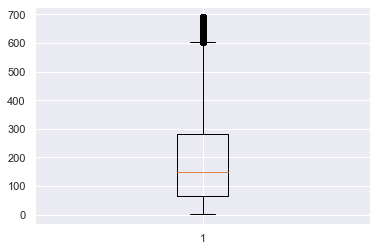

In [5]:
plt.boxplot(ratings.user_id.value_counts())
plt.show()
# better

But there are still users with one or really less number of ratings. They will not provide us any (or very very little) information.

#### Selecting ratings: make sure there aren't any user that give less ratings than the specified threashold

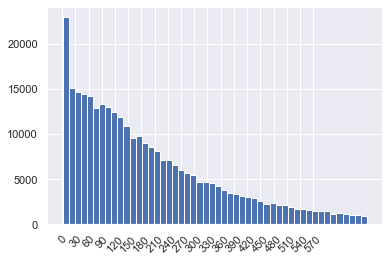

count    304820.000000
mean        192.206030
std         160.363286
min           1.000000
25%          66.000000
50%         150.000000
75%         281.000000
max         692.000000
Name: user_id, dtype: float64

In [6]:
plt.hist(ratings['user_id'].value_counts(),bins=50)
plt.xticks(np.arange(0,600,30), rotation=45)
plt.show()
ratings['user_id'].value_counts().describe()

In [7]:
temp_df = ratings.user_id.value_counts()
temp_rating_filter = temp_df >= 39 # Threshold: > 0.25 percentile
ratings = ratings[ratings['user_id'].isin((temp_df[temp_rating_filter]).index)]
del temp_rating_filter, temp_df

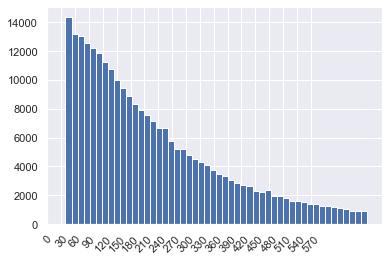

count    256297.000000
mean        225.402408
std         153.743134
min          39.000000
25%         103.000000
50%         183.000000
75%         312.000000
max         692.000000
Name: user_id, dtype: float64

In [8]:
plt.hist(ratings['user_id'].value_counts(),bins=50)
plt.xticks(np.arange(0,600,30), rotation=45)
plt.show()
ratings['user_id'].value_counts().describe()

#### Selecting ratings again: this time for animes that are rated really few times

In [9]:
ratings['anime_id'].value_counts().describe()

count     14728.000000
mean       3922.457971
std       11936.540447
min           1.000000
25%          11.000000
50%         160.000000
75%        1883.250000
max      193141.000000
Name: anime_id, dtype: float64

In [10]:
print(f"Before non populer anime removal user num: {len(ratings.user_id.value_counts().index)}")
print(f"Before non populer anime removal rating num: {len(ratings.index)}")
print(f"Before non populer anime removal rated anime num: {len(ratings.anime_id.value_counts().index)}")

temp_df = ratings['anime_id'].value_counts()
anime_filter = temp_df.quantile(0.25, interpolation='nearest')
temp_df = temp_df[temp_df > int(anime_filter)]
ratings = ratings[ratings['anime_id'].isin(temp_df.index)]

print("\n")
print(f"After non populer anime removal user num: {len(ratings.user_id.value_counts().index)}")
print(f"After non populer anime removal rating num: {len(ratings.index)}")
print(f"After non populer anime removal rated anime num: {len(temp_df.index)}")
del temp_df, anime_filter


Before non populer anime removal user num: 256297
Before non populer anime removal rating num: 57769961
Before non populer anime removal rated anime num: 14728


After non populer anime removal user num: 256297
After non populer anime removal rating num: 57754619
After non populer anime removal rated anime num: 10988


#### Scaling Ratings

In [11]:
scaler = preprocessing.MinMaxScaler()
ratings['rating'] = scaler.fit_transform(np.array(ratings['rating']).reshape(-1,1))
del scaler

### 2.c Anime Info DataFrame: Selecting Animes (Filter Out Really Unpopuler or Unloved Ones)
By feature engineering & comparing with ratings

#### Feature Engineering and Filtering Based on Created Features
Trying to get two measures: How relevant anime is and how loved is it.

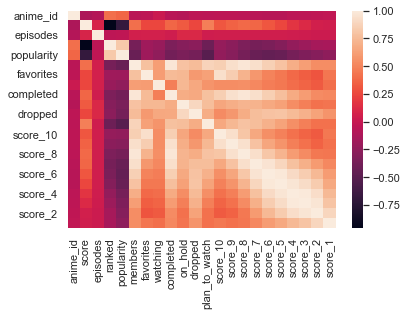

In [12]:
sns.heatmap(animes.corr())
plt.show()

In [13]:
## These two features will be used in relevancy

w = preprocessing.normalize([np.array(animes['watching'])])
p = preprocessing.normalize([np.array(animes['plan_to_watch'])])
o = preprocessing.normalize([np.array(animes['on_hold'])])
c = preprocessing.normalize([np.array(animes['completed'])])
d = preprocessing.normalize([np.array(animes['dropped'])]) # user changed mind and didn't watch: negative

animes.ranked.replace(0,animes.ranked.max()+1, inplace=True)
r_p = preprocessing.normalize([1/np.array(animes['ranked'])]) # r_p: rank point

# popularity and ranking of 2 animes are 0, which is not valid actually (and was not mentioned by the author of the data)
# so i had to fill these values up by manually, i filled them by animes.feature.max() + 1 as i believe if they
# were to be popular they wouldn't have invalid values for popularity
animes.popularity.replace(0,animes.popularity.max()+1, inplace=True)
pp = preprocessing.normalize([1 / np.array(animes['popularity'])])

m = preprocessing.normalize([np.array(animes['members'])])
f = preprocessing.normalize([np.array(animes['favorites'])])

# gave really low score: negative (h: hatred)
h = preprocessing.normalize([np.array(animes[['score_3', 'score_2', 'score_1']].sum(axis=1))]) 

# How many users rated that anime: rate count
rc = preprocessing.normalize([np.array(animes.loc[:,"score_10":"score_1"].sum(axis=1))])

# How many users watched this anime (currently watching, counts more in relevancy) vr: view rate 
vr = w[0] + 0.8*p[0] + 0.6*o[0] + 0.4*c[0] + 0.4*d[0]
vr = preprocessing.normalize([vr])
relevancy_score = vr[0] + rc[0]
relevancy_score = preprocessing.normalize([relevancy_score])
animes['relevancy_score'] = relevancy_score[0]


## This features will be used in love_score
love_score = f[0] + 0.8*pp[0] + 0.6*m[0] + 0.6*r_p[0] - 0.4*d[0] - 0.8*h[0]
love_score = preprocessing.normalize([love_score])
animes['love_score'] = love_score[0]

# dropping other unnecessary columns
del c,w,p,o,d,r_p,pp,m,f,h,rc,vr,relevancy_score,love_score
animes.drop(columns=['ranked'],inplace=True) 
animes.drop(columns=['watching', 'completed', 'on_hold', 'dropped', 'plan_to_watch'],inplace=True)
animes.drop(columns=['score_10', 'score_9', 'score_8', 'score_7', 'score_6',
       'score_5', 'score_4', 'score_3', 'score_2', 'score_1'],inplace=True)
# for score: ranking is already an index based on this, corr=-1 nearly
animes.drop(columns=['score', 'popularity', 'members', 'favorites'],inplace=True)

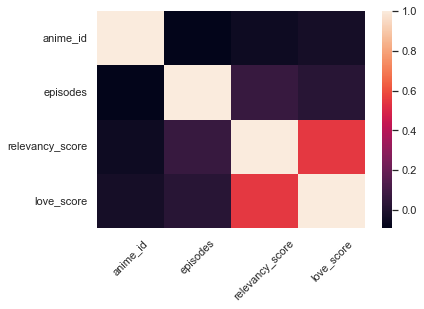

In [14]:
sns.heatmap(animes.corr())
plt.xticks(rotation=45)
plt.show()

In [15]:
animes.corr()
# Not that bad for relevancy and love score correlation, we should've already expected
# that these two scores would be correlated. (features we used were correlated among them)
# High correlation would make our 'good animes to consider' filter too wide 
# low correlation would make the opposite I belive where these two
# metrics are currently is good

,anime_id,episodes,relevancy_score,love_score
anime_id,1.000000,-0.092706,-0.053995,-0.029899
episodes,-0.092706,1.000000,0.066697,0.026479
relevancy_score,-0.053995,0.066697,1.000000,0.546710
love_score,-0.029899,0.026479,0.546710,1.000000


<b>Filtering Animes</b>

In [16]:
animes['temp_geo_average'] = animes['love_score']*animes['relevancy_score'] / \
    (animes['love_score'] + animes['relevancy_score'])

temp_filter = animes['temp_geo_average']>animes['temp_geo_average'].quantile(0.05) # filter based on geometric average of two score
print("Before the filter, the number of anime is: ",len(animes))
animes = animes[temp_filter]
print("After the filter, the number of anime is: ",len(animes))
animes.drop(columns=['temp_geo_average'], inplace=True)
del temp_filter

Before the filter, the number of anime is:  16217
After the filter, the number of anime is:  15406


#### Removing animes that are not rated (not in the ratings df) & removing ratings of animes that are not in animes df

In [17]:
print(f"Before filtering by ratings, anime num in anime info df: {len(animes.index)}")
animes = animes[animes['anime_id'].isin(set(ratings.anime_id))]
print(f"After filtering by ratings, anime num in anime info df: {len(animes.index)}\n\n")

# only consider ratings that are in animes dataframe (for collaborative and content based filter consistency)
# This should not effect our df too much but it is better to see how much it changes
print(f"Before filtering rating num: {len(ratings.index)}")
print(f"Before filtering user num that rated: {len(ratings.user_id.unique())}")
print(f"Before filtering anime num: {len(ratings.anime_id.unique())}")
ratings = ratings[ratings.anime_id.isin(animes.anime_id)]
print("")
print(f"After filtering rating num: {len(ratings.index)}")
print(f"After filtering user num that rated: {len(ratings.user_id.unique())}")
print(f"After filtering anime num: {len(ratings.anime_id.unique())}")

Before filtering by ratings, anime num in anime info df: 15406
After filtering by ratings, anime num in anime info df: 10178


Before filtering rating num: 57754619
Before filtering user num that rated: 256297
Before filtering anime num: 10988

After filtering rating num: 47774294
After filtering user num that rated: 256297
After filtering anime num: 10178


### 2.d Creating Encoding and Decoding Dictionaries For Anime and User IDs 

In [18]:
import pickle
user_id_decoding = {i:x for i,x in enumerate(ratings['user_id'].unique())}
user_id_encoding = {x:i for i,x in enumerate(ratings['user_id'].unique())}

anime_id_decoding = {i:x for i,x in enumerate(ratings['anime_id'].unique())}
anime_id_encoding = {x:i for i,x in enumerate(ratings['anime_id'].unique())}
ratings.user_id = ratings.user_id.map(user_id_encoding)
ratings.anime_id = ratings.anime_id.map(anime_id_encoding)
animes.anime_id = animes.anime_id.map(anime_id_encoding)
with open('model_variables/preprocessed_datasets/id_encode_decode.pkl', 'wb') as outp:
    pickle.dump(user_id_decoding, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(user_id_encoding, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(anime_id_decoding, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(anime_id_encoding, outp, pickle.HIGHEST_PROTOCOL)

### 2.e Adding metadata feature to animes using other columns

In [19]:
# I used YAKE (Yet Another Keyword Extraction Algorithm) for extracting info from text
# yake is an implementation of this algorithm in python
# !pip install yake
import yake
# Only the 'synopsis' column will be used from this df. We know that this column is in correct form
# there is '' for no synopsis
animes_w_synopsis = pd.read_csv('data_cleansed/anime_synopsis.csv')
animes_w_synopsis = animes_w_synopsis[animes_w_synopsis['name'].isin(animes['name'])]
animes_w_synopsis.anime_id = animes_w_synopsis.anime_id.map(anime_id_encoding)
animes = pd.merge(animes, animes_w_synopsis[['anime_id','synopsis']], on="anime_id", how="left")
animes.synopsis.fillna('', inplace=True) # for animes that don't correspond to animes_w_synopsis
del animes_w_synopsis


# initilaze empty string for all animes' meta data combined string
animes['meta_combined'] = ''


basic_str_op_lst = ['studios', 'producers', 'licensors', 'genres', 'type', 'source']
feature_weigths = {'studios':1, 'producers':1, 'licensors':1, 'genres':2, 'type':1, 'source':1}

for col in basic_str_op_lst:
    animes[col] = animes[col].str.replace(" ","")
    animes[col] = animes[col].str.replace(","," ")
    animes[col].replace('Unknown', '', inplace=True)
    animes[col] = animes[col].str.lower()


In [20]:
# takes about a minute and thirty seconds
def get_meta_combined(row):
    phrase = ''
    for feature in basic_str_op_lst:
        text = row[feature]
        if text == "":
            continue
        phrase += " " +  " ".join([text]*feature_weigths[feature]).strip()
        
    text = row['synopsis']
    if text == "":
        return phrase.strip()
    language = "en"
    max_phrase_size = 1
    num_of_words = 10
    
    y = yake.KeywordExtractor(lan=language, n=max_phrase_size, top=num_of_words, features=None)
    
    key_words = y.extract_keywords(text)
    scaler = preprocessing.MinMaxScaler(feature_range=(1,3))
    key_word_weigths = scaler.fit_transform(np.flip(np.array([x[1] for x in key_words])).reshape(-1,1)).flatten()
    for i, word in enumerate(key_words):
        phrase += " " + " ".join([word[0].strip()] * round(key_word_weigths[i])).strip()
        
    return phrase.strip()
    

animes['meta_combined'] = animes.apply(get_meta_combined, axis=1)
animes['meta_combined'] = animes['meta_combined'].str.lower()
animes.sort_values(by='anime_id', ascending=True, inplace=True)

In [21]:
# One might one to save these, because otherwise we'll change these elements for model building
import os
if not os.path.exists("model_variables/preprocessed_datasets"):
    os.mkdir("model_variables/preprocessed_datasets/")
animes.to_csv("model_variables/preprocessed_datasets/animes.csv", index=False)
ratings.to_csv("model_variables/preprocessed_datasets/ratings.csv", index=False)

### 2.f Creating User-Item Matrix for Collaborative Filtering
Warning: This step also takes a bit long (approx 6 min if ratings is already read, approx 9 minutes if not)

In [22]:
# This step takes a bit long even with threading
import concurrent.futures
import pandas as pd
import numpy as np

if 'ratings' not in globals().keys():
    ratings = pd.read_csv("model_variables/preprocessed_datasets/ratings.csv")
else:
    ratings = globals()['ratings']

x = len(ratings.groupby('user_id'))
y = len(ratings.groupby('anime_id'))


# our ratings now is only a numpy array (for efficiency purpouses)
ratings = np.array(ratings)# [ ['user_id', 'anime_id', 'rating'], ['user_id', 'anime_id', 'rating'] ...]


user_item_matrix = np.empty((x, y)) # init empty matrix
user_item_matrix.fill(np.nan)
users = np.arange(0,x) # represents users (since ids are mapped to 0-x)


def create_user_item_matrix(anime):
    """
    For inputted anime id (encoded) this function calculates and assigns to 
    (in user-item) the ratings of users that rated the anime
    """
    global user_item_matrix
    anime_rating_v = ratings[ratings[:,1] == anime] # ratings vector that include that particular anime id (given in the func param)
    # assign users (which gave that rating) rating in the matrix to that rating 
    user_item_matrix[np.isin(users, anime_rating_v[:,0]), anime] = anime_rating_v[:,2] 

with concurrent.futures.ThreadPoolExecutor() as executer:
    for anime in np.unique(ratings[:,1]).astype(int): # For unique anime ids in the ratings df
        executer.submit(create_user_item_matrix, anime) # submit that execution of func with the param

np.random.shuffle(user_item_matrix) # shuffle  before splitting into train-test, now user-id mapping dict is useless

np.save('model_variables/user_item_matrix.npy',user_item_matrix)

train_size = int(80 * user_item_matrix.shape[0] / 100)

# saving train and test matrixes
np.save('model_variables/u_i_matrix_train.npy',user_item_matrix[:train_size])
np.save('model_variables/u_i_matrix_test.npy',user_item_matrix[train_size:])
# IMPORTANT: we are getting rid of 'ratings' since we now have user-item matrix
# we also removed user-item matrix as we've saved it into our hard disc
del ratings, x, y, user_item_matrix, anime, executer, train_size, users

## <b>3 - Model Building </b>

### 3.a Creating Anime-Similarity Matrix From Anime Meta Data: Content Based Filtering

In [23]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

if 'animes' not in globals().keys():
    animes = pd.read_csv("model_variables/preprocessed_datasets/animes.csv")
else:
    animes = globals()['animes']

count_term = CountVectorizer()

count_matrix = count_term.fit_transform(animes['meta_combined'])
cosine_sim = cosine_similarity(count_matrix, count_matrix)
np.save('model_variables/anime_similarity_matrix.npy',cosine_sim)
del cosine_sim, count_matrix, count_term, animes

### 3.b Using User-Item Matrix to Create User Features and Item Features Matrices: Collaborative Filtering

In [ ]:
if 'user_item_matrix' not in globals().keys():
    user_item_matrix = pd.read_csv("model_variables/u_i_matrix_train.npy")
else:
    user_item_matrix = globals()['user_item_matrix']


## <b>4 - Building Hybrid Filter / Define Recommendation Functions</b>

### 4.a Defining Functions For Content Based Filtering

In [24]:
def get_meta(name: str):
    import pandas as pd
    if 'animes' not in globals().keys():
        animes = pd.read_csv("model_variables/preprocessed_datasets/animes.csv")
    else:
        animes = globals()['animes']

    a = animes[animes['name'].str.lower() == name.lower()]
    if len(a.index)!= 0:
            a = a.iloc[0]
    else:
        try:
            a = animes[animes.name.str.lower().str.contains(name.lower(),
             regex=False)].iloc[0]
        except IndexError:
            print('anime not found')
            return -1
    
    return (a['name'], a['meta_combined'])

def get_synopsis(name: str):
    import pandas as pd
    if 'animes' not in globals().keys():
        animes = pd.read_csv("model_variables/preprocessed_datasets/animes.csv")
    else:
        animes = globals()['animes']

    a = animes[animes['name'].str.lower() == name.lower()]
    if len(a.index)!= 0:
            a = a.iloc[0]
    else:
        try:
            a = animes[animes.name.str.lower().str.contains(name.lower(),
             regex=False)].iloc[0]
        except IndexError:
            print('anime not found')
            return -1
    
    return (a['name'], a['synopsis'])

def get_recommendations_content_based(name: str):
    import numpy as np
    import pandas as pd
    if 'animes' not in globals().keys():
        animes = pd.read_csv("model_variables/preprocessed_datasets/animes.csv")
    else:
        animes = globals()['animes']
    
    if 'cosine_sim' not in globals().keys():
        cosine_sim = np.load("model_variables/anime_similarity_matrix.npy")

    else:
        cosine_sim = globals()['cosine_sim']
    import pandas as pd

    a = animes[animes['name'].str.lower() == name.lower()]
    if len(a.index)!= 0:
            a = a.iloc[0]
    else:
        try:
            a = animes[animes.name.str.lower().str.contains(name.lower(),
             regex=False)].iloc[0]
        except IndexError:
            print('anime not found')
            return -1
    
    print(f"recommendations for {a['name']}:")
    print("\n\n")
    id_encoded = a.anime_id
    similarities_vector = cosine_sim[id_encoded]
    ind = np.argpartition(similarities_vector, -11)[-11:]
    for enc_anm_id in np.flip(ind[np.argsort(similarities_vector[ind])])[1:]:
        err  = round(1-similarities_vector[enc_anm_id],3)
        print(animes.name[animes.anime_id == enc_anm_id].iloc[0],"-->", "with an error of", err)
    
    return 0
    

### 4.b Defining Functions For Collaborative Based Filtering

In [25]:
def get_recommendations_collaborative_based(user: np.ndarray):
    find_similar_users(user, n=10)

def find_similar_users(user, n) -> np.ndarray:
    import numpy as np
    from scipy import spatial
    from sklearn.metrics.pairwise import cosine_similarity
    if 'ratings' not in globals().keys():
        ratings = np.load("model_variables/user_item_matrix.npy")
    else:
        ratings = globals()['ratings']

    result = cosine_similarity(ratings, user)
    print(result[1])
    a = np.array([])
    return a

## <b>5 - Main Program</b>

In [26]:
get_recommendations_content_based("Naruto")


recommendations for Naruto:



Naruto: Shippuuden --> with an error of 0.228
Boruto: Naruto Next Generations --> with an error of 0.362
Naruto: Shippuuden Movie 6 - Road to Ninja --> with an error of 0.448
Boruto: Naruto the Movie --> with an error of 0.481
Naruto: Shippuuden Movie 4 - The Lost Tower --> with an error of 0.482
Naruto: Shippuuden Movie 5 - Blood Prison --> with an error of 0.506
Saint Seiya: The Lost Canvas - Meiou Shinwa 2 --> with an error of 0.522
Naruto: Takigakure no Shitou - Ore ga Eiyuu Dattebayo! --> with an error of 0.524
Naruto Soyokazeden Movie: Naruto to Mashin to Mitsu no Onegai Dattebayo!! --> with an error of 0.53
Duel Masters! --> with an error of 0.53


0

In [3]:
get_recommendations_content_based("Dragon Ball Z")

recommendations for Dragon Ball Z:



Dragon Ball Z: Zenbu Misemasu Toshi Wasure Dragon Ball Z! --> with an error of 0.325
Dragon Ball Kai --> with an error of 0.419
Dragon Ball Z Movie 14: Kami to Kami --> with an error of 0.465
Dragon Ball GT --> with an error of 0.49
Dragon Ball --> with an error of 0.506
One Piece Film: Strong World --> with an error of 0.531
One Piece --> with an error of 0.552
Kizuna Ichigeki --> with an error of 0.559
Dragon Ball Kai: Mirai ni Heiwa wo! Goku no Tamashii yo Eien ni --> with an error of 0.562
Saint Seiya: The Lost Canvas - Meiou Shinwa 2 --> with an error of 0.572


0

In [6]:
get_recommendations_content_based("Kizuna Ichigeki")


recommendations for Kizuna Ichigeki:



Dragon Ball Z: Zenbu Misemasu Toshi Wasure Dragon Ball Z! --> with an error of 0.524
Dragon Ball Z --> with an error of 0.559
Kemeko no Love --> with an error of 0.705
Dekobou Shingachou: Meian no Shippai --> with an error of 0.705
Imokawa Mukuzo: Chuugaeri no Maki --> with an error of 0.705
Kitte no Gensou --> with an error of 0.705
Tengu Taiji --> with an error of 0.705
Pop --> with an error of 0.705
Manga --> with an error of 0.705
Ooatari Sora no Entaku --> with an error of 0.705


0

In [5]:
get_meta("Kizuna Ichigeki")

('Kizuna Ichigeki',
 'ascension imagine comedy martialarts comedy martialarts movie original kizuna kizuna kizuna tournament tournament tournament todoroki todoroki todoroki martial martial martial arts arts reporter reporter world world grandfather grandfather winning winning winnings')